<a href="https://colab.research.google.com/github/valeryefim/MLforDS/blob/zad2/indtask2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подготовка среды разработки

In [ ]:
!pip install category_encoders > None

In [ ]:
# импортируем необходимые для работы библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from category_encoders import BinaryEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.base import BaseEstimator, RegressorMixin

# Описание датасета "Sleep, Health, and Lifestyle"


Этот набор данных, содержащий 373 строки и 13 столбцов, предоставляет информацию о различных аспектах, описывающих лайфстайл человека.

- Person ID: A unique identifier for each participant.
- Gender: The participant's gender (Male/Female).
- Age: The participant's age in years.
- Occupation: The job or career of the participant.
- Sleep Duration (hours): The daily sleep duration of the participant in hours.
- Quality of Sleep (scale: 1-10): A subjective assessment of sleep quality on a scale from 1 to 10.
- Physical Activity Level (minutes/day): The daily duration of physical activity for the participant, measured in minutes.
- Stress Level (scale: 1-10): A subjective assessment of the participant's stress level on a scale from 1 to 10.
- BMI Category: The participant's BMI classification (e.g., Underweight, Normal, Overweight).
- Blood Pressure (systolic/diastolic): The participant's blood pressure, represented as systolic pressure over diastolic pressure.
- Heart Rate (bpm): The participant's resting heart rate, measured in beats per minute.
- Daily Steps: The number of steps the participant takes each day.
- Sleep Disorder: The presence or absence of a sleep disorder in the participant (None, Insomnia, Sleep Apnea).

In [ ]:
# загружаем датасет
data = pd.read_csv("/content/ss.csv")
data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


Target-переменной для нашей модели станец признак "Качество сна" ("Quality of Sleep").

# Проведем предобработку данных и EDA перед тем, как начать обучение

In [ ]:
# проведем кодирование столбцов "Gender" и "BMI Category" методом Label encoding.
# Для этого воспользуемся методом из библиотеки sklearn
for col in ["Gender", "BMI Category"]:
  le = LabelEncoder()
  le.fit(data[col])
  data[col + "_encoded"] = le.transform(data[col])
  # удалим старые столбцы
  data.drop(columns=[col], inplace=True)
data

,Person ID,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Gender_encoded,BMI Category_encoded
0,1,27,Software Engineer,6.1,6,42,6,126/83,77,4200,None,1,3
1,2,28,Doctor,6.2,6,60,8,125/80,75,10000,None,1,0
2,3,28,Doctor,6.2,6,60,8,125/80,75,10000,None,1,0
3,4,28,Sales Representative,5.9,4,30,8,140/90,85,3000,Sleep Apnea,1,2
4,5,28,Sales Representative,5.9,4,30,8,140/90,85,3000,Sleep Apnea,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,369,59,Nurse,8.1,9,75,3,140/95,68,7000,Sleep Apnea,0,3
369,370,59,Nurse,8.1,9,75,3,140/95,68,7000,Sleep Apnea,0,3
370,371,59,Nurse,8.0,9,75,3,140/95,68,7000,Sleep Apnea,0,3
371,372,59,Nurse,8.1,9,75,3,140/95,68,7000,Sleep Apnea,0,3


In [ ]:
# разделим столбец "Blood Pressure" на два: верхнее давление и нижнее, чтобы эти параметры воспринимались алгоритмами как числа, а не строки
pressure_df = data['Blood Pressure'].str.split('/', expand=True)
pressure_df = pressure_df.rename({0: 'Blood Pressure Upper', 1:'Blood Pressure Lower'}, axis = 1)
pressure_df

,Blood Pressure Upper,Blood Pressure Lower
0,126,83
1,125,80
2,125,80
3,140,90
4,140,90
...,...,...
368,140,95
369,140,95
370,140,95
371,140,95


In [ ]:
# добавим новые столбцы в датасет и удалим старый столбец
data = data.join(pressure_df)
data = data.drop(["Blood Pressure", "Sleep Disorder", "Person ID"],  axis = 1)
data

,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Gender_encoded,BMI Category_encoded,Blood Pressure Upper,Blood Pressure Lower
0,27,Software Engineer,6.1,6,42,6,77,4200,1,3,126,83
1,28,Doctor,6.2,6,60,8,75,10000,1,0,125,80
2,28,Doctor,6.2,6,60,8,75,10000,1,0,125,80
3,28,Sales Representative,5.9,4,30,8,85,3000,1,2,140,90
4,28,Sales Representative,5.9,4,30,8,85,3000,1,2,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...
368,59,Nurse,8.1,9,75,3,68,7000,0,3,140,95
369,59,Nurse,8.1,9,75,3,68,7000,0,3,140,95
370,59,Nurse,8.0,9,75,3,68,7000,0,3,140,95
371,59,Nurse,8.1,9,75,3,68,7000,0,3,140,95


In [ ]:
# с помощью метода Binary encoding проведем кодирование столбца с профессиями.
# в данном случае Label encoding нам бы не подошел, так как создал бы иерархию между профессиями
enc = BinaryEncoder(cols=["Occupation"])
data = enc.fit_transform(data)
data

,Age,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Gender_encoded,BMI Category_encoded,Blood Pressure Upper,Blood Pressure Lower
0,27,0,0,0,1,6.1,6,42,6,77,4200,1,3,126,83
1,28,0,0,1,0,6.2,6,60,8,75,10000,1,0,125,80
2,28,0,0,1,0,6.2,6,60,8,75,10000,1,0,125,80
3,28,0,0,1,1,5.9,4,30,8,85,3000,1,2,140,90
4,28,0,0,1,1,5.9,4,30,8,85,3000,1,2,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,59,0,1,0,1,8.1,9,75,3,68,7000,0,3,140,95
369,59,0,1,0,1,8.1,9,75,3,68,7000,0,3,140,95
370,59,0,1,0,1,8.0,9,75,3,68,7000,0,3,140,95
371,59,0,1,0,1,8.1,9,75,3,68,7000,0,3,140,95


In [ ]:
# проверим наличие nan-значений в датасете и в случае необходимости избавимся от них
data.isna().sum()

Age                        0
Occupation_0               0
Occupation_1               0
Occupation_2               0
Occupation_3               0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
Heart Rate                 0
Daily Steps                0
Gender_encoded             0
BMI Category_encoded       0
Blood Pressure Upper       0
Blood Pressure Lower       0
dtype: int64

Построим корреляционную матрицу, чтобы понять, какие столбцы сильно коррелируют друг с другом и могут помешать качественному обучению модели

<ipython-input-9-71a438c3f000>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

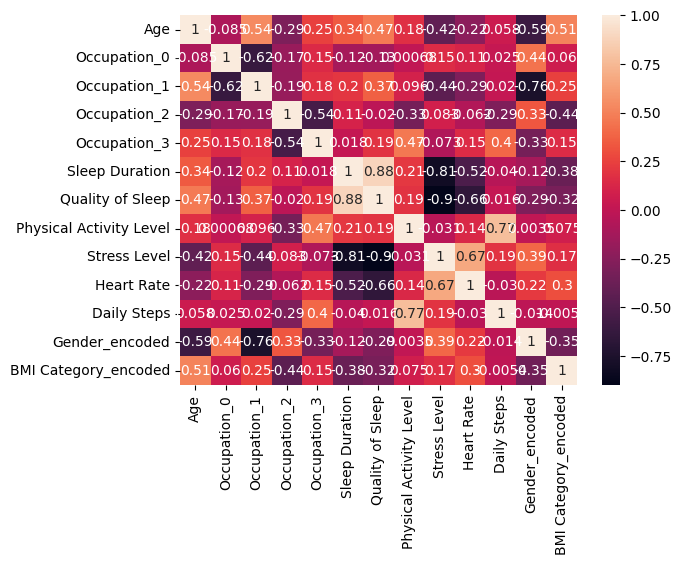

In [ ]:
corr = data.corr()
sns.heatmap(corr, annot=True)

Столбец "Quality of Sleep" сильно зависит от признаков "Stress Level" и "Sleep Duration". Попробуем построить модель и проверить, как наличие данных признаков повлияет на ее качество.

In [ ]:
X = data.drop("Quality of Sleep", axis=1)

In [ ]:
X_norm = X.copy()
X_norm = X_norm.drop(["Occupation_0", "Occupation_1", "Occupation_2", "Occupation_3", "Gender_encoded", "BMI Category_encoded"], axis=1)
X_norm

,Age,Sleep Duration,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Blood Pressure Upper,Blood Pressure Lower
0,27,6.1,42,6,77,4200,126,83
1,28,6.2,60,8,75,10000,125,80
2,28,6.2,60,8,75,10000,125,80
3,28,5.9,30,8,85,3000,140,90
4,28,5.9,30,8,85,3000,140,90
...,...,...,...,...,...,...,...,...
368,59,8.1,75,3,68,7000,140,95
369,59,8.1,75,3,68,7000,140,95
370,59,8.0,75,3,68,7000,140,95
371,59,8.1,75,3,68,7000,140,95


In [ ]:
# проведем масштибирование некоторых столбцов с помощью нормализации
mms = MinMaxScaler()
mms.fit(X_norm)

MinMaxScaler()

In [ ]:
# проверим, совпадают ли мин/макс значения, полученные MinMaxScaler, реальным (да :))
np.set_printoptions(suppress=True)
print(f"MMS max: {mms.data_max_}")
print(f"Real max: {X_norm.max().to_list()}")

MMS max: [   59.      8.5    90.      8.     86.  10000.    142.     95. ]
Real max: [59, 8.5, 90, 8, 86, 10000, '142', '95']


In [ ]:
print(f"MMS max: {mms.data_min_}")
print(f"Real max: {X_norm.min().to_list()}")

MMS max: [  27.     5.8   30.     3.    65.  3000.   115.    75. ]
Real max: [27, 5.8, 30, 3, 65, 3000, '115', '75']


In [ ]:
# теперь преобразуем значения тестовой выборки
X_norm = pd.DataFrame(mms.transform(X_norm), columns=X_norm.columns)
X_norm

,Age,Sleep Duration,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Blood Pressure Upper,Blood Pressure Lower
0,0.00000,0.111111,0.20,0.6,0.571429,0.171429,0.407407,0.40
1,0.03125,0.148148,0.50,1.0,0.476190,1.000000,0.370370,0.25
2,0.03125,0.148148,0.50,1.0,0.476190,1.000000,0.370370,0.25
3,0.03125,0.037037,0.00,1.0,0.952381,0.000000,0.925926,0.75
4,0.03125,0.037037,0.00,1.0,0.952381,0.000000,0.925926,0.75
...,...,...,...,...,...,...,...,...
368,1.00000,0.851852,0.75,0.0,0.142857,0.571429,0.925926,1.00
369,1.00000,0.851852,0.75,0.0,0.142857,0.571429,0.925926,1.00
370,1.00000,0.814815,0.75,0.0,0.142857,0.571429,0.925926,1.00
371,1.00000,0.851852,0.75,0.0,0.142857,0.571429,0.925926,1.00


In [ ]:
# создадим новый, уже обработанный датасет из двух старых
X = X.drop(["Age", "Sleep Duration", "Physical Activity Level", "Stress Level",
              "Heart Rate", "Daily Steps", "Blood Pressure Upper", "Blood Pressure Lower"], axis=1)

In [ ]:
data_norm = pd.concat([X_norm, X], axis=1, join='inner')
data_norm

,Age,Sleep Duration,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Blood Pressure Upper,Blood Pressure Lower,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Gender_encoded,BMI Category_encoded
0,0.00000,0.111111,0.20,0.6,0.571429,0.171429,0.407407,0.40,0,0,0,1,1,3
1,0.03125,0.148148,0.50,1.0,0.476190,1.000000,0.370370,0.25,0,0,1,0,1,0
2,0.03125,0.148148,0.50,1.0,0.476190,1.000000,0.370370,0.25,0,0,1,0,1,0
3,0.03125,0.037037,0.00,1.0,0.952381,0.000000,0.925926,0.75,0,0,1,1,1,2
4,0.03125,0.037037,0.00,1.0,0.952381,0.000000,0.925926,0.75,0,0,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,1.00000,0.851852,0.75,0.0,0.142857,0.571429,0.925926,1.00,0,1,0,1,0,3
369,1.00000,0.851852,0.75,0.0,0.142857,0.571429,0.925926,1.00,0,1,0,1,0,3
370,1.00000,0.814815,0.75,0.0,0.142857,0.571429,0.925926,1.00,0,1,0,1,0,3
371,1.00000,0.851852,0.75,0.0,0.142857,0.571429,0.925926,1.00,0,1,0,1,0,3


## Выбор модели и ее обучение. Прогнозирование качества сна

In [ ]:
# делим выборку на тестовую и train
X, y = data_norm, data["Quality of Sleep"]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y)

In [ ]:
# сделаем константное предсказание, чтобы нам было
# легче проконтролировать, что наша более сложная модель действительно дает нам прирост качества.
DC = DummyClassifier(strategy="most_frequent")
DC.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [ ]:
DC_predictions = DC.predict(X_test)
MSE = mean_squared_error(y_test, DC_predictions)
RMSE = sqrt(mean_squared_error(y_test, DC_predictions))
print(f"MSE: {MSE}, RMSE: {RMSE}")
DC_predictions

MSE: 1.8533333333333333, RMSE: 1.361371857110809


array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8])

**Линейная регрессия**

In [ ]:
# обучим модель линейной регрессии и получим предсказанные ею значения
reg = LinearRegression()
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)
predictions

array([6.07878631, 7.86859124, 8.1842396 , 5.77050399, 8.15129187,
       7.91066237, 8.16105375, 7.10333994, 6.06086816, 9.06416393,
       6.07878631, 8.98002167, 7.82658224, 8.14004925, 7.82652012,
       7.10340206, 5.32379218, 8.02514061, 6.03986365, 7.91066237,
       5.85458413, 5.77050399, 7.15242519, 7.14541107, 8.24513389,
       5.812513  , 8.9145519 , 6.03671518, 7.15608795, 6.0577818 ,
       7.12440657, 5.72843287, 8.9145519 , 6.0577818 , 5.85458413,
       6.03986365, 9.08516843, 8.18852408, 5.77050399, 8.99863204,
       8.10922075, 7.04727843, 8.99863204, 7.73345823, 8.00388882,
       5.80816541, 7.13142068, 7.86859124, 7.10333994, 5.80816541,
       8.00388882, 8.14004925, 7.91066237, 9.10617293, 6.03986365,
       6.70448945, 8.10922075, 8.1567025 , 6.03986365, 8.10922075,
       7.08934955, 4.3281576 , 5.80816541, 8.87248077, 9.10617293,
       7.12440657, 9.01963654, 8.15129187, 8.99863204, 6.68713357,
       9.06416393, 6.70448945, 5.51601735, 7.10333994, 7.06133

Проведем анализ получившихся результатов

In [ ]:
# воспользуемся метрикой СКО. Она хорошо сработает в нашем случае, так как значения целевой переменной
# не очень большие => не будет больших квадратов
MSE = mean_squared_error(y_test, predictions)
RMSE = sqrt(mean_squared_error(y_test, predictions))
print(f"MSE: {MSE}, RMSE: {RMSE}")

MSE: 0.03881855368558412, RMSE: 0.1970242464408483


После масштабирования признаков качество предсказаний модели осталось таким же, как с менее обработанными данными из прошлого ИДЗ (MSE: 0.038818553685586024 в случае с линейной регрессией).

Однако, по сравнению с Dummy Classifier, в линейной регрессии мы можем увидеть значительный прирост качества. Попробуем воспользовать другими моделями.

**Случайный лес**

In [ ]:
rfc = RandomForestClassifier(max_depth=4)
rfc = rfc.fit(X_train, y_train)
rfc_predictions = rfc.predict(X_test)
MSE = mean_squared_error(y_test, rfc_predictions)
RMSE = sqrt(mean_squared_error(y_test, rfc_predictions))
print(f"MSE: {MSE}, RMSE: {RMSE}")

MSE: 0.05333333333333334, RMSE: 0.23094010767585033


В силу того, что датасет сравнительно небольшой, "Случаный лес" достаточно быстро переобучился, поэтому пришлось его ограничить глубиной = 4. Например, что происходит на значениях глубины >= 5:

In [ ]:
rfc = RandomForestClassifier(max_depth=5)
rfc = rfc.fit(X_train, y_train)
rfc_predictions = rfc.predict(X_test)
MSE = mean_squared_error(y_test, rfc_predictions)
RMSE = sqrt(mean_squared_error(y_test, rfc_predictions))
print(f"MSE: {MSE}, RMSE: {RMSE}")

MSE: 0.0, RMSE: 0.0


*Переобучение :)*

**Метод KNN**

In [ ]:
knc = KNeighborsClassifier(n_neighbors=7)
knc.fit(X_train, y_train)
knc_predictions = knc.predict(X_test)
MSE = mean_squared_error(y_test, knc_predictions)
RMSE = sqrt(mean_squared_error(y_test, knc_predictions))
print(f"MSE: {MSE}, RMSE: {RMSE}")

MSE: 0.22666666666666666, RMSE: 0.4760952285695233


Метод сработал хуже остальных, несмотря на то, что данные были предобработаны по методу нормализации (что хорошо влияет на предсказания KNN). Рассмотрим предсказание более сложной, ансамблевой модели. Воспользуемся стекингом.

# Применение ансамблевой модели (стекинга)

In [ ]:
class Stacking(BaseEstimator, RegressorMixin):
        def __init__(self, models, meta_model):
          self.models = models
          self.meta_model = meta_model
          self.n = len(models)
          self.valid = None

        def fit(self, X, y=None):
          X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=1)
          self.valid = np.zeros((X_valid.shape[0], self.n))

          for i, model in enumerate(self.models):
            model.fit(X_train, y_train)
            self.valid[:, i] = model.predict(X_valid)
            self.meta_model.fit(self.valid, y_valid)
          return self

        def predict(self, X, y=None):
          X_meta = np.zeros((X.shape[0], self.n))

          for i, model in enumerate(self.models):
            X_meta[:, i] = model.predict(X)

          return self.meta_model.predict(X_meta)

In [ ]:
np.set_printoptions()
models = [LinearRegression(), RandomForestClassifier(), KNeighborsClassifier()]
meta_model = LinearRegression()

stacking_model = Stacking(models, meta_model)
stacking_model.fit(X_train, y_train)
final_pred = stacking_model.predict(X_test)
MSE = mean_squared_error(y_test, final_pred)
RMSE = sqrt(MSE)
print(f"MSE: {MSE}, RMSE: {RMSE}")

MSE: 0.05996108456915514, RMSE: 0.24486952560323863


# Итоговое сравнение результатов по всем моделям
(по метрике MSE (и RMSE), которая сильно "штрафуют" модели за ошибки)

***Линейная регрессия***

MSE: 0.03881855368558412, RMSE: 0.1970242464408483

***Случайный лес***

MSE: 0.05333333333333334, RMSE: 0.23094010767585033

***Метод K-ближайших соседей***

MSE: 0.22666666666666666, RMSE: 0.4760952285695233

***Стекинг***

MSE: 0.05996108456915514, RMSE: 0.24486952560323863

По результатам обучения моделей, благодаря метрике MSE, можно сделать вывод, что конкретно на этих данных лучше всего справилась модель линейной регрессии. Предположительно, это связано с тем, что изначально был взят не очень большой датасет, из-за чего, например, модель "Случайный лес" переобучилась на сравнительно небольшой глубине.

В целом, все модели справились довольно неплохо, предполгаю, что благодаря предобработке удалось получить хорошие результаты предсказаний. Но в моем случае стоит отдать предпочтение линейной регрессии (так как ее метрики лучше остальных)